In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import matplotlib.ticker as plticker
from openpyxl import load_workbook

In [2]:
def nos(c,in1):
    in2=np.where(c[in1[0]]==0)
    in3=np.where(c[in1[0]]>0)
    return len(in2[0]),len(in3[0])

In [3]:
def pcal(f,c):
    mf=np.mean(f)
    in1=np.where(f<=mf)
    in2=np.where(f>mf)
    n00,n01=nos(c,in1)
    n10,n11=nos(c,in2)
    if (n00==0 or n01==0):
        p00=0.5
        p01=0.5
    else:
        p00=n00/(n00+n01)
        p01=n01/(n00+n01)
    if(n10==0 or n11==0):
        p10=0.5
        p11=0.5
    else:
        p10=n10/(n10+n11)
        p11=n11/(n10+n11)
    return p00,p01,p10,p11,in1,in2

In [4]:
def giniscal(f,c):
    p00,p01,p10,p11,in1,in2=pcal(f,c)
    gl=1-p00*p00-p01*p01;
    gr=1-p10*p10-p11*p11;
    fgs=(len(in1[0])/(len(in1[0])+len(in2[0])))*gl+(len(in2[0])/(len(in1[0])+len(in2[0])))*gr
    return fgs

In [5]:
def cecal(f,c):
    p00,p01,p10,p11,in1,in2=pcal(f,c)
    ce1=1-max(p00,p01)
    ce2=1-max(p10,p11)
    pce=(len(in1[0])/(len(in1[0])+len(in2[0])))*ce1+(len(in2[0])/(len(in1[0])+len(in2[0])))*ce2
    return pce

In [6]:
def chisqcal(f,c):
    mf=np.mean(f)
    in1=np.where(f<=mf)
    in2=np.where(f>mf)
    n00,n01=nos(c,in1)
    n10,n11=nos(c,in2)
    Nyy=((n11+n01)*(n11+n10))/(len(in1[0])+len(in2[0]))
    Nyn=((n10+n00)*(n11+n10))/(len(in1[0])+len(in2[0]))
    Nny=((n11+n01)*(n01+n00))/(len(in1[0])+len(in2[0]))
    Nnn=((n10+n00)*(n01+n00))/(len(in1[0])+len(in2[0]))
    cs=(((Nyy-n11)*(Nyy-n11))/(Nyy+0.000001))+(((Nyn-n10)*(Nyn-n10))/(Nyn+0.000001))+(((Nny-n01)*(Nny-n01))/(Nny+0.000001))+(((Nnn-n00)*(Nnn-n00))/(Nnn+0.000001))
    return cs

In [7]:
def igcal(f,c):
    p00,p01,p10,p11,in1,in2=pcal(f,c)
    pup=(len(in1[0]))/(len(in1[0])+len(in2[0]))
    pdown=(len(in2[0]))/(len(in1[0])+len(in2[0]))
    el=(-1*p00*np.log2(p00+0.00001))+(-1*p01*np.log2(p01+0.00001))
    er=(-1*p10*np.log2(p10+0.00001))+(-1*p11*np.log2(p11+0.00001))
    ep=(-1*pup*np.log2(pup+0.00001))+(-1*pdown*np.log2(pdown+0.00001))
    infogain=ep-((len(in1[0])/(len(in1[0])+len(in2[0])))*el+(len(in2[0])/(len(in1[0])+len(in2[0])))*er)
    return infogain

In [8]:
def grcal(f,c):
    p00,p01,p10,p11,in1,in2=pcal(f,c)
    pup=(len(in1[0]))/(len(in1[0])+len(in2[0])+0.0001)
    pdown=(len(in2[0]))/(len(in1[0])+len(in2[0])+0.0001)
    el=(-1*p00*np.log2(p00+0.00001))+(-1*p01*np.log2(p01+0.00001))
    er=(-1*p10*np.log2(p10+0.00001))+(-1*p11*np.log2(p11+0.00001))
    ep=(-1*pup*np.log2(pup+0.00001))+(-1*pdown*np.log2(pdown+0.00001))
    infogain=ep-((len(in1[0])/(len(in1[0])+len(in2[0])))*el+(len(in2[0])/(len(in1[0])+len(in2[0])))*er)
    splinfo=-pup*np.log2(pup+0.0001)-pdown*np.log2(pdown+0.0001)
    gr=infogain/(splinfo+0.0001)
    return gr

In [9]:
def maxf(fname,arr,nf,ft,a):
    arr1=np.zeros(nf)
    for i in range(1,57):
        arr1[i-1]=np.argmax(arr[i-1])
    x=np.zeros([56,5])
    y = [i for i in range(1,57)]
    for i in range(1,57):
        fname1=fname+str(i)+'.csv'
        data=np.genfromtxt(fname1,delimiter=',')
        k=math.ceil(math.log2(data[:,:-1].shape[1]))
        x[i-1,0:5]=np.argsort(-1*arr[i-1,0:20])[0:k]
    major_ticks = np.linspace(1, nf,nf)
    minor_ticks = np.linspace(0, ft-1,ft)
    fig, ax = plt.subplots()
    fig.set_figheight(7)
    fig.set_figwidth(20)
    m=[]
    for xe, ye in zip(y, x):
        plt.scatter([xe] * len(ye), ye,color='black')
    ax.set_xticks(major_ticks)
    ax.set_yticks(minor_ticks)
    ax.set_xlabel('File Number')
    ax.set_ylabel('Feature Number')
    for i in range(57):
        plt.axvline(x=i+0.5,color='black')
    for i in range(-1,20):
        plt.axhline(y=i+0.5,color='black')
    fn='Top logn Features based on '+a
    plt.title(fn,fontsize=30, fontweight='bold')
    plt.show()
    

In [10]:
def minf(fname,arr,nf,ft,a):
    arr1=np.zeros(nf)
    for i in range(1,nf+1):
        arr1[i-1]=np.argmin(arr[i-1])
    x=np.zeros([56,5])
    y = [i for i in range(1,57)]
    for i in range(1,57):
        fname1=fname+str(i)+'.csv'
        data=np.genfromtxt(fname1,delimiter=',')
        k=math.ceil(math.log2(data[:,:-1].shape[1]))
        x[i-1,0:5]=np.argsort(arr[i-1,0:20])[0:k]
    major_ticks = np.linspace(1, nf,nf)
    minor_ticks = np.linspace(0, ft-1,ft)
    fig, ax = plt.subplots()
    fig.set_figheight(7)
    fig.set_figwidth(20)
    m=[]
    for xe, ye in zip(y, x):
        plt.scatter([xe] * len(ye), ye,color='black')
    ax.set_xticks(major_ticks)
    ax.set_yticks(minor_ticks)
    ax.set_xlabel('File Number')
    ax.set_ylabel('Feature Number')
    for i in range(57):
        plt.axvline(x=i+0.5,color='black')
    for i in range(-1,20):
        plt.axhline(y=i+0.5,color='black')
    fn='Top logn Features based on '+a
    plt.title(fn,fontsize=30, fontweight='bold')
    plt.show()

In [11]:
def featureranking(fname1):
    
    gsv=np.zeros((56,20))
    gsv1=np.zeros((56,25))
    ce=np.zeros((56,20))
    ce1=np.zeros((56,25))
    chsq=np.zeros((56,20))
    chsq1=np.zeros((56,25))
    gar=np.zeros((56,20))
    gar1=np.zeros((56,25))
    inga=np.zeros((56,20))
    inga1=np.zeros((56,25))
    for i in range(1,57):
        fname=fname1+str(i)+'.csv'
        data=np.genfromtxt(fname,delimiter=',')
        for j in range(0,20):
            gsv[i-1,j]=giniscal(data[:,j],data[:,-1])
            ce[i-1,j]=cecal(data[:,j],data[:,-1])
            chsq[i-1,j]=chisqcal(data[:,j],data[:,-1])
            gar[i-1,j]=grcal(data[:,j],data[:,-1])
            inga[i-1,j]=igcal(data[:,j],data[:,-1])
            gsv1[i-1,j]=giniscal(data[:,j],data[:,-1])
            ce1[i-1,j]=cecal(data[:,j],data[:,-1])
            chsq1[i-1,j]=chisqcal(data[:,j],data[:,-1])
            gar1[i-1,j]=grcal(data[:,j],data[:,-1])
            inga1[i-1,j]=igcal(data[:,j],data[:,-1])
        gsv1[i-1,20:25]=np.argsort(gsv[i-1,0:20])[0:5]
        ce1[i-1,20:25]=np.argsort(ce[i-1,0:20])[0:5]
        chsq1[i-1,20:25]=np.argsort(-1*chsq[i-1,0:20])[0:5]
        gar1[i-1,20:25]=np.argsort(-1*gar[i-1,0:20])[0:5]
        inga1[i-1,20:25]=np.argsort(-1*inga[i-1,0:20])[0:5]
    fname=fname1
    
    print('Gini Split Value')
    print(gsv1)
    df1=pd.DataFrame(gsv1)
    df1.to_excel('/Users/durbasatpathi/Desktop/2019A7PS0972H_part1.xlsx',sheet_name='GINI')
    print('\n'+'Best Feature based on Gini Split Value')
    minf(fname,gsv,56,20,'Gini Split')
    
    
    print('\n'+'\n'+'Classification Error')
    print(ce1)
    path = r"/Users/durbasatpathi/Desktop/2019A7PS0972H_part1.xlsx"
    book = load_workbook(path)
    writer = pd.ExcelWriter(path, engine = 'openpyxl')
    writer.book = book
    df=pd.DataFrame(ce1)
    df.to_excel(writer, sheet_name='ClassiError')
    writer.save()
    print('\n'+'Best Feature based on Classification Error')
    minf(fname,ce,56,20,'Classification Error')
    
    
    print('\n'+'\n'+'Chi Square Value')
    print(chsq1)
    writer = pd.ExcelWriter(path, engine = 'openpyxl')
    writer.book = book
    df=pd.DataFrame(chsq1)
    df.to_excel(writer, sheet_name='ChiSq')
    writer.save()
    print('\n'+'Best Feature based on Chi Square Value')
    maxf(fname,chsq,56,20,'Chi Square')
    
    
    print('\n'+'\n'+'Gain Ratio Value')
    print(gar1)
    writer = pd.ExcelWriter(path, engine = 'openpyxl')
    writer.book = book
    df=pd.DataFrame(gar1)
    df.to_excel(writer, sheet_name='GainRatio')
    writer.save()
    print('\n'+'Best Feature based on Gain Ratio Value')
    maxf(fname,gar,56,20,'Gain Ratio')
    
    
    print('\n'+'\n'+'Info Gain Value')
    print(inga1)
    writer = pd.ExcelWriter(path, engine = 'openpyxl')
    writer.book = book
    df=pd.DataFrame(inga1)
    df.to_excel(writer, sheet_name='InfoGain')
    writer.save()
    print('\n'+'Best Feature based on Info Gain Value')
    maxf(fname,inga,56,20,'Information Gain')

Gini Split Value
[[ 0.235       0.26861538  0.26701525 ... 14.         10.
   4.        ]
 [ 0.34665143  0.33667824  0.34528495 ... 13.          4.
  18.        ]
 [ 0.17943721  0.19064367  0.19334279 ...  4.          8.
   5.        ]
 ...
 [ 0.38146128  0.3265425   0.37578662 ... 15.          7.
  16.        ]
 [ 0.44244778  0.49210845  0.49483269 ...  4.          5.
  13.        ]
 [ 0.28532792  0.36612576  0.49464923 ...  0.         10.
   4.        ]]

Best Feature based on Gini Split Value


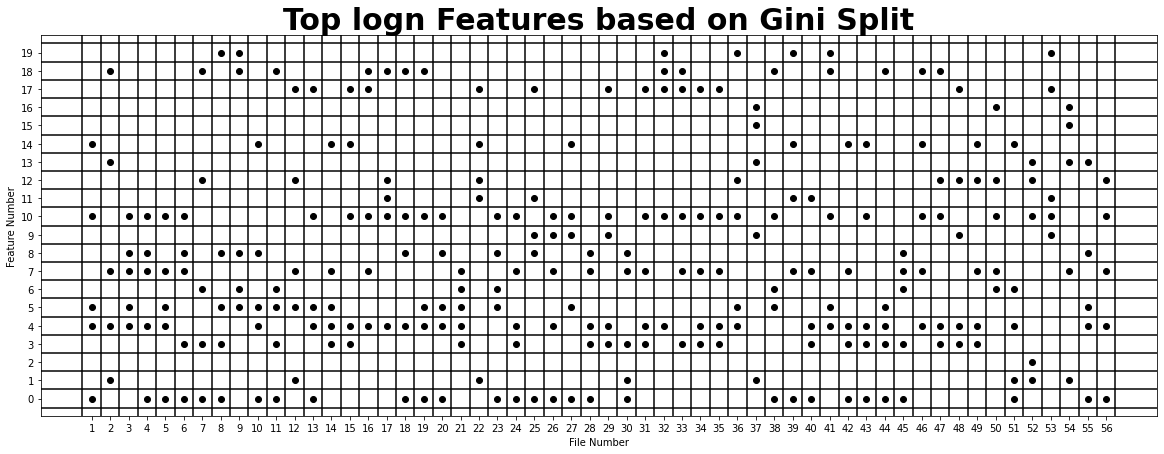



Classification Error
[[ 0.16        0.16        0.16       ... 16.         14.
   5.        ]
 [ 0.2247191   0.2247191   0.2247191  ... 11.          0.
  17.        ]
 [ 0.10921502  0.10921502  0.10921502 ...  4.         18.
  14.        ]
 ...
 [ 0.25680272  0.25680272  0.25680272 ...  0.         17.
  16.        ]
 [ 0.34567901  0.45061728  0.45061728 ...  4.          5.
  13.        ]
 [ 0.17241379  0.24137931  0.44827586 ...  0.          4.
  10.        ]]

Best Feature based on Classification Error


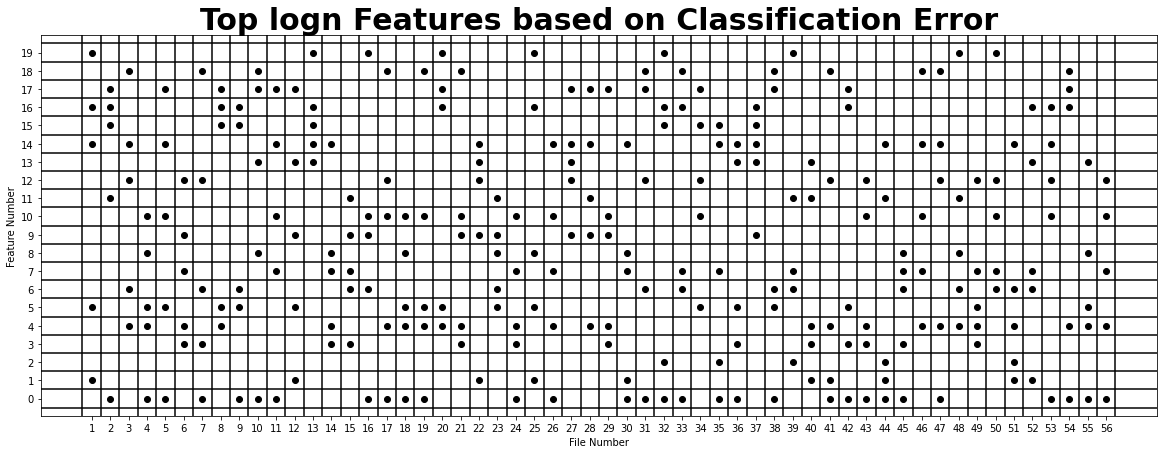



Chi Square Value
[[15.71800435  0.08585164  0.82996138 ... 14.         10.
   4.        ]
 [ 0.91412097  6.00889885  1.61218166 ... 13.          4.
  18.        ]
 [22.79405371  5.9187888   1.85430657 ...  4.          8.
   5.        ]
 ...
 [ 0.38339107 84.98224998  9.12484417 ... 15.          7.
  16.        ]
 [18.29647511  2.16708572  1.28227335 ...  4.          5.
  13.        ]
 [12.27196272  7.53499605  0.         ...  0.         10.
   4.        ]]

Best Feature based on Chi Square Value


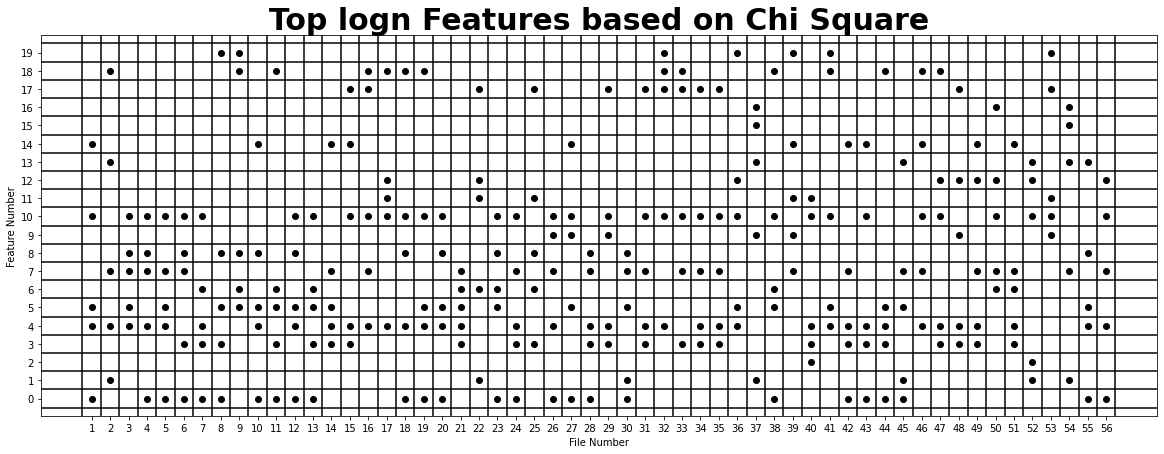



Gain Ratio Value
[[ 4.20406911e-01  3.65523424e-01 -9.81085801e-02 ...  4.00000000e+00
   7.00000000e+00  1.00000000e+01]
 [ 1.70253047e-01  2.51360987e-01 -4.56966662e-01 ...  1.30000000e+01
   1.40000000e+01  4.00000000e+00]
 [ 4.88166916e-01  5.17062941e-01  1.55158361e-01 ...  4.00000000e+00
   1.00000000e+00  8.00000000e+00]
 ...
 [ 1.10390259e-01  2.83679749e-01 -5.08251551e-01 ...  9.00000000e+00
   1.40000000e+01  1.50000000e+01]
 [-1.78313093e-01 -3.95322133e-02 -5.61997536e-01 ...  1.40000000e+01
   1.00000000e+00  1.30000000e+01]
 [ 3.22380038e-01  1.85359879e-01  2.52560503e+04 ...  1.50000000e+01
   0.00000000e+00  7.00000000e+00]]

Best Feature based on Gain Ratio Value


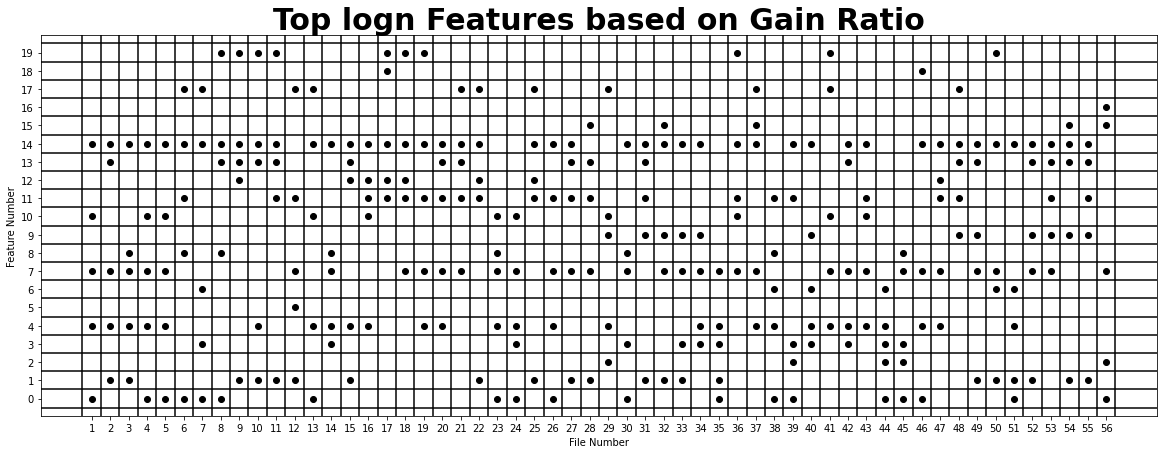



Info Gain Value
[[ 0.39623105  0.36503231 -0.05626388 ...  4.          0.
  10.        ]
 [ 0.15694024  0.24984642 -0.23914547 ... 13.         14.
   4.        ]
 [ 0.42618454  0.51661343  0.0905923  ...  7.         15.
   4.        ]
 ...
 [ 0.10190394  0.27814715 -0.27251007 ...  9.         14.
  15.        ]
 [-0.13819572 -0.03758626 -0.35703846 ... 14.          1.
  13.        ]
 [ 0.31537068  0.181329   -0.99225221 ...  7.          4.
  17.        ]]

Best Feature based on Info Gain Value


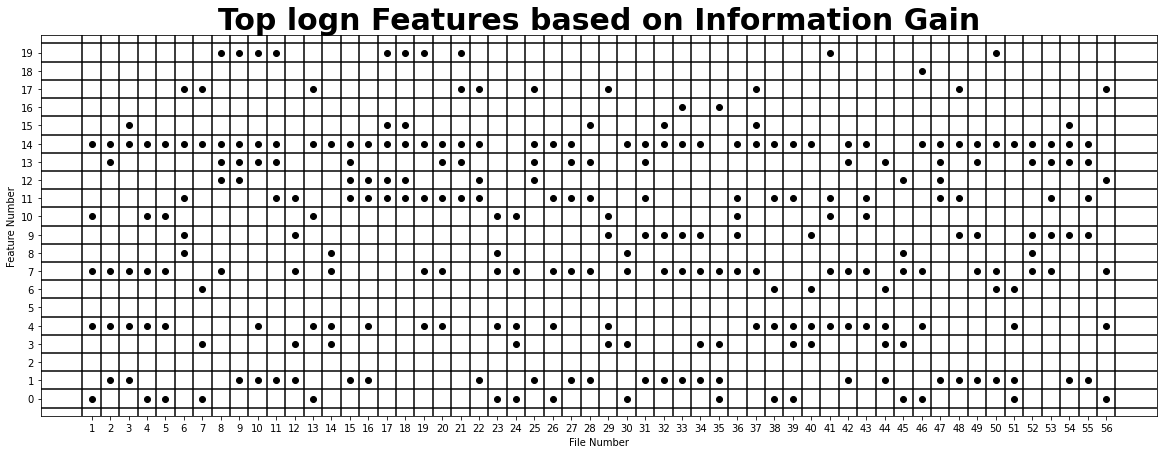

In [12]:
fname1='/Users/durbasatpathi/Documents/datamining/data/'
featureranking(fname1)